# Classification Model for Business

Dataset for the Project was downloaded from Microsoft; the 3 data sammples was merged, explored, munged and exported to 
the file **AW__dataset**

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Dataset to build model
AW_data = pd.read_csv('C:/Users/user/Downloads/AW_dataset.csv', sep=',', index_col=0)
AW_data.head(); AW_data.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'CustomerAge', 'CustomerAgegr',
       'BikeBuyer'],
      dtype='object')

In [3]:
#Split Features and labels
labels = AW_data.iloc[:,-1].values

#Check data between the two classes[A class imbalance exists, data for customers who did not make purchase are more to the other]
Bikebuyercounts = AW_data[['BikeBuyer','CustomerID']].groupby('BikeBuyer').count()
print(Bikebuyercounts)

#Features are determined from data exploration.

#Numeric features
Numericfeatures = ['NumberCarsOwned','NumberChildrenAtHome','YearlyIncome']


           CustomerID
BikeBuyer            
0               10949
1                5455


In [4]:
#Categorical features
Catfeatures = ['City','Education','Occupation','Gender','MaritalStatus','CustomerAgegr']

#Function to transfore and encode categorical features
def encodestring(cat_feature):
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder
    lab = LabelEncoder()
    lab.fit(cat_feature)
    feature = lab.transform(cat_feature)
    
    enc = OneHotEncoder()
    enc.fit(feature.reshape(-1,1))
    feature = enc.transform(feature.reshape(-1,1)).toarray()
    return feature

#Encode the feature - CountryRegionName
feature = encodestring(AW_data['CountryRegionName'])

#Loop to encode other categorical features
for cat in Catfeatures:
    temp = encodestring(AW_data[cat])
    feature = np.concatenate([feature, temp], axis=1)
feature.shape

#Concatenate Categorical features with Numeric
feature =  np.concatenate([feature,np.array(AW_data[Numericfeatures])], axis =1)
print(feature)
feature.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

[[1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
  1.37947e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 3.00000e+00
  1.01141e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 3.00000e+00
  9.19450e+04]
 ...
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 2.00000e+00 0.00000e+00
  1.33053e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 2.00000e+00 0.00000e+00
  3.19300e+04]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 2.00000e+00 0.00000e+00
  5.93820e+04]]


(16404, 294)

In [5]:
#Scaling of Data using scale
from sklearn.preprocessing import scale as sc
feature[:,-3:] = sc(feature[:,-3:])

#Splitting dataset into train and test
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(feature,labels, test_size=0.3)

#Training the Model using Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(features_train, label_train)
label_pred = classifier.predict(features_test)

#Model intercept and coefficients
print(classifier.intercept_)
#print(classifier.coef_)

#Model accuracy metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support as prfs

cm = confusion_matrix(label_test,label_pred)
ac = accuracy_score(label_test,label_pred)
prf = prfs(label_test,label_pred)
print('Confusion Matrix =%s' % (cm))
print('Accuracy =', ac)
print('Precision =',prf[0])
print('Recall =', prf[1])
print('fScore =', prf[2])
print('Null-0 =',prf[3][0]); print('Alternative-1 =',prf[3][1])


[-0.63240915]
Confusion Matrix =[[2914  369]
 [ 679  960]]
Accuracy = 0.7870784234051199
Precision = [0.81102143 0.72234763]
Recall = [0.8876028 0.585723 ]
fScore = [0.84758581 0.64690027]
Null-0 = 3283
Alternative-1 = 1639


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


From the confusion matrix, 691 customers that bought merchandise has been classified wrongly, thereby making the sales department of the organization miss out on potential sales lead. The recall for Potential Buyers is 0.577 or 57%. The model has to be improved on

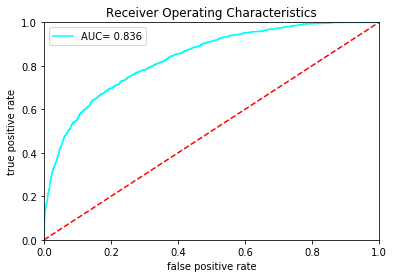

In [6]:
#Plot the ROC curves and calculating the area under the curve(AUC)

from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(label_test,classifier.predict_proba(features_test)[:,1])
fpr, tpr, threshold
auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,color='cyan', label='AUC= %0.3f' %auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.legend()
plt.show()


### Adjusting the Model for Class Imbalance

#### Adjusting class weights

In [7]:
#The class_weights are adjusted 

classifier = LogisticRegression(C=1.0, class_weight={0:0.35,1:0.65})
classifier.fit(features_train, label_train)
label_pred = classifier.predict(features_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix =[[2602  681]
 [ 475 1164]]
Accuracy = 0.7651361235270215
Precision = [0.84562886 0.63089431]
Recall = [0.79256777 0.71018914]
fScore = [0.81823899 0.66819747]
Null-0 = 3283
Alternative-1 = 1639


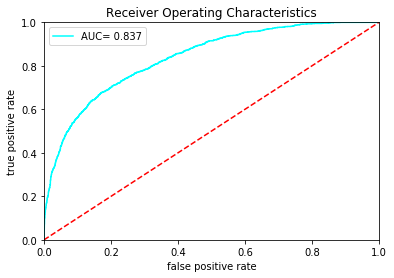

In [8]:
#Defining the function metrics
def metrics():
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support as prfs

    cm = confusion_matrix(label_test,label_pred)
    ac = accuracy_score(label_test,label_pred)
    prf = prfs(label_test,label_pred)
    print('Confusion Matrix =%s' % (cm))
    print('Accuracy =', ac)
    print('Precision =',prf[0])
    print('Recall =', prf[1])
    print('fScore =', prf[2])
    print('Null-0 =',prf[3][0]); print('Alternative-1 =',prf[3][1])
    
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, threshold = roc_curve(label_test,classifier.predict_proba(features_test)[:,1])
    fpr, tpr, threshold
    auc = auc(fpr,tpr)
    plt.title('Receiver Operating Characteristics')
    plt.plot(fpr,tpr,color='cyan', label='AUC= %0.3f' %auc)
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    plt.legend()
    plt.show()
metrics()

The accuracy score didn't change much; model accuracy score is 76%. The recall for those who bought merchandise improved to 70.9%, and AUC(Area Under Curve) of the ROC(Reciever Operating Characteristics) has improved to 0.841.

#### Adjusting the threhold value

In [9]:
probabilites = classifier.predict_proba(features_test)
threshold = [0.3,0.35,0.4,0.45,0.5] #default threshold value is 0.5, the other values to see if it favours the model prediction


def score_model(threshold):
    safe = [] #A place holder for the values
    for i in threshold:
        print('Threshold of %s' %i); print('-'*25)
        score = np.array([1 if x>i else 0 for x in probabilites[:,1]])
        safe.append(score)
        pfs = prfs(label_test,score)
        print('Macro precision of %0.4f' % (pfs[1].mean())) #Average Macro Rrecision
        print('Macro recall of %0.4f' % (pfs[2].mean())) #Average Macro Recall
        print('accuracy score =', accuracy_score(label_test,score))
        print('precision scores =',pfs[0])
        print('Specifity or Sensitivity =',pfs[1])
        print('fscores =',pfs[2])
        #print('Actual =',pfs[3])
        print()
        print('Confusion Matrix')
        print(confusion_matrix(label_test,score))
        print();print()
        
    return safe
score_model(threshold)

Threshold of 0.3
-------------------------
Macro precision of 0.7239
Macro recall of 0.6741
accuracy score = 0.677570093457944
precision scores = [0.89515377 0.50936599]
Specifity or Sensitivity = [0.58513555 0.86272117]
fscores = [0.70768097 0.6405436 ]

Confusion Matrix
[[1921 1362]
 [ 225 1414]]


Threshold of 0.35
-------------------------
Macro precision of 0.7336
Macro recall of 0.6960
accuracy score = 0.7031694433157253
precision scores = [0.88021703 0.53523357]
Specifity or Sensitivity = [0.64240024 0.82489323]
fscores = [0.7427364  0.64921969]

Confusion Matrix
[[2109 1174]
 [ 287 1352]]


Threshold of 0.4
-------------------------
Macro precision of 0.7389
Macro recall of 0.7119
accuracy score = 0.7234863876472979
precision scores = [0.86595583 0.56054007]
Specifity or Sensitivity = [0.69265915 0.7852349 ]
fscores = [0.76967338 0.65412961]

Confusion Matrix
[[2274 1009]
 [ 352 1287]]


Threshold of 0.45
-------------------------
Macro precision of 0.7482
Macro recall of 0.730

[array([1, 1, 0, ..., 0, 0, 1]),
 array([1, 1, 0, ..., 0, 0, 0]),
 array([1, 1, 0, ..., 0, 0, 0]),
 array([1, 1, 0, ..., 0, 0, 0]),
 array([1, 1, 0, ..., 0, 0, 0])]

Threshold value of 0.4 is selected to as it is an improved model to the existing ones. 72.66% Model accuracy score and sensitivity score of 78.99%

### Cross Validation Scoring

In [10]:
from sklearn.model_selection import cross_validate as cv
labels = labels.reshape(-1,1)
#scoring metrics for the cross validation model
scoring = ['precision_macro', 'recall_macro', 'roc_auc']
classifier = LogisticRegression(C = 1.0, class_weight = {0:0.35, 1:0.65}) 
#cv model is loaded
scores = cv(classifier, feature, labels, scoring=scoring,
                        cv=10, return_train_score=False)

#Plot format of the cv fold results

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_precision_macro']))]
    print('         Precision     Recall       AUC')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_precision_macro'], 
                                          scores['test_recall_macro'],
                                          scores['test_roc_auc'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_precision_macro']), np.mean(scores['test_recall_macro']), np.mean(scores['test_roc_auc'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_precision_macro']), np.std(scores['test_recall_macro']), np.std(scores['test_roc_auc'])))

print_cv(scores)    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

         Precision     Recall       AUC
Fold  1    0.729        0.738      0.826
Fold  2    0.756        0.773      0.841
Fold  3    0.723        0.737      0.829
Fold  4    0.736        0.751      0.840
Fold  5    0.748        0.766      0.857
Fold  6    0.750        0.762      0.848
Fold  7    0.739        0.754      0.845
Fold  8    0.733        0.742      0.836
Fold  9    0.725        0.739      0.828
Fold 10    0.729        0.746      0.841
----------------------------------------
Mean       0.737        0.751      0.839
Std        0.011        0.012      0.009


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


An Average precision of 73.7% and AUC of 0.839

### Optimize Hyperparameter

In [11]:
from sklearn.model_selection import KFold, GridSearchCV
#the kfold split
kfold = KFold(n_splits =10, shuffle=True)

param_grid = {'C':[0.01,0.1,1,10,100,100]}
classifier = LogisticRegression(class_weight = {0:0.35,1:0.65})
optimized_param = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=kfold, scoring='roc_auc', return_train_score=True)

optimized_param.fit(feature,labels)

keys =list(optimized_param.cv_results_.keys()); #keys
for key in keys[6:16]:
    print(optimized_param.cv_results_[key])
#To get the best estimator
optimized_param.best_estimator_.C


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

[0.83635584 0.83719514 0.83160763 0.8285599  0.82753053 0.82753053]
[0.84295464 0.84454846 0.84005304 0.83733992 0.83662567 0.83662567]
[0.84965118 0.85073595 0.84740876 0.84539347 0.84509346 0.84509346]
[0.8499062  0.84901219 0.84522148 0.84234169 0.84187524 0.84187524]
[0.82709973 0.83160924 0.829726   0.82838225 0.82847162 0.82847162]
[0.83994885 0.84129649 0.83917589 0.83776608 0.83730567 0.83730567]
[0.83628429 0.83893889 0.83578676 0.83359796 0.83305702 0.83305702]
[0.84502014 0.84752273 0.84592187 0.84462656 0.84367999 0.84367999]
[0.84101596 0.83972387 0.83541467 0.83275888 0.83100723 0.83100723]
[0.84071415 0.84283814 0.84071415 0.8391008  0.83880731 0.83880731]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1

The best estimator is the C=0.1

In [12]:
from sklearn.model_selection import cross_val_score

classifier = LogisticRegression(C=0.1, class_weight={0:0.35,1:0.65})
cv_estimate = cross_val_score(classifier,feature,labels,cv=kfold)

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))
    
##OR
cv_estimated = cv(classifier,feature,labels,cv=kfold,scoring=scoring,
                             return_train_score=False)
print_cv(cv_estimated)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

Mean performance metric = 0.768
SDT of the metric       = 0.010
Outcomes by cv fold
Fold  1    0.768
Fold  2    0.762
Fold  3    0.753
Fold  4    0.771
Fold  5    0.751
Fold  6    0.766
Fold  7    0.776
Fold  8    0.773
Fold  9    0.789
Fold 10    0.771


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

         Precision     Recall       AUC
Fold  1    0.724        0.730      0.820
Fold  2    0.744        0.758      0.844
Fold  3    0.757        0.774      0.859
Fold  4    0.737        0.748      0.835
Fold  5    0.745        0.753      0.845
Fold  6    0.742        0.754      0.843
Fold  7    0.718        0.733      0.837
Fold  8    0.754        0.769      0.851
Fold  9    0.738        0.756      0.840
Fold 10    0.745        0.765      0.851
----------------------------------------
Mean       0.740        0.754      0.843
Std        0.011        0.013      0.010


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model Implementation

In [13]:
#Data import, and feature engineering.

AW_test = pd.read_csv('C:/Users/user/Downloads/AW_test.csv', sep=',')



#Feature Engineering

AW_test['CustomerAge']=(pd.to_datetime('1998-01-01') - pd.to_datetime(AW_test['BirthDate'])).astype(np.timedelta64(1,'Y'))
AW_test['CustomerAge']=AW_test['CustomerAge'].astype(np.int64)
Age_group = {'A1':'Under 25','A2':'Between 25-45', 'A3':'Between 45-55','A4':'Over 55'}
AW_test['CustomerAgegr']=['A1' if x<25 else 'A2' if (x>= 25 and x<=45) else 'A3' if (x>=45 and x<=55) else 'A4' for x in AW_test['CustomerAge']]
AW_test['CustomerAgegr']=[Age_group[x] for x in AW_test['CustomerAgegr']]

AW_dummy = AW_data.drop(['AveMonthSpend','BikeBuyer'], axis=1)

AW_tests = pd.concat([AW_dummy,AW_test], axis=0)
#Features Encoding

AW_feature = encodestring(AW_tests['CountryRegionName'])
#Loop to encode other categorical features
for cat in Catfeatures:
    temp = encodestring(AW_tests[cat])
    AW_feature = np.concatenate([AW_feature, temp], axis=1)
#Concatenate Categorical features with Numeric
AW_feature =  np.concatenate([AW_feature,np.array(AW_tests[Numericfeatures])], axis =1)

#Scaling of Data using scale

from sklearn.preprocessing import scale as sc
AW_feature[:,-3:] = sc(AW_feature[:,-3:])

#Test dataset
AWtest = AW_feature[-500:,:]
AWtrain = AW_feature[:-500,:]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

Prediction of the class of customer 

In [14]:
classifier = LogisticRegression(C=0.1, class_weight = {0:0.35,1:0.65})
classifier.fit(AWtrain,labels)

AW_proba = classifier.predict_proba(AWtest)
threshold = 0.5
AW_label = np.array([1 if i>threshold else 0 for i in AW_proba[:,1]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
AW_label; AW_label

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,

## Write Data to Excel

In [16]:
import xlsxwriter
workbook = xlsxwriter.Workbook('result.xlsx')
worksheet = workbook.add_worksheet()
row=0
col=0
for label in (AW_label):
    worksheet.write(row,col,label)
    row +=1
workbook.close()